In [1]:
import pandas as pd
import numpy as np

# Time series analyses 

In [2]:
data = pd.read_csv('IPG2211A2N.csv',index_col=0)
data.head()

,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [3]:
data.index = pd.to_datetime(data.index)
data.columns = ['Energy Production']

In [4]:
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


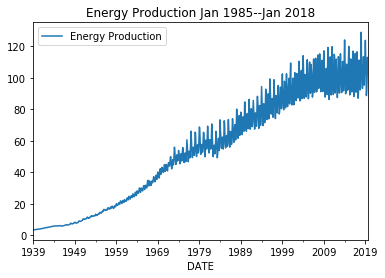

In [5]:
data.plot(title="Energy Production Jan 1985--Jan 2018")

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

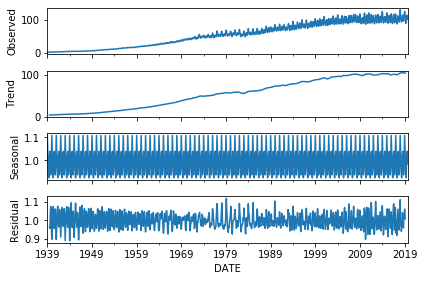

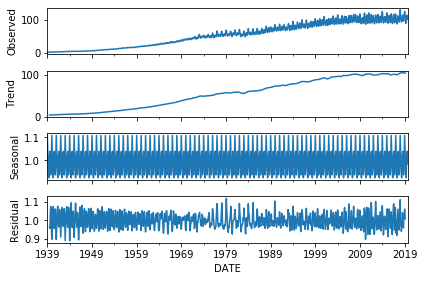

In [7]:
result.plot()

In [14]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3826.334, BIC=3850.648, Fit time=2.698 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=4341.588, BIC=4351.313, Fit time=0.046 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4172.146, BIC=4191.597, Fit time=0.579 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=3950.626, BIC=3970.077, Fit time=1.487 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=3825.469, BIC=3854.646, Fit time=3.586 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4003.837, BIC=4028.150, Fit time=3.745 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3818.913, BIC=3852.952, Fit time=26.312 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3942.914, BIC=3972.091, Fit time=6.907 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=3816.594, BIC=3855.496, Fit time=17.294 seconds
Fit ARIMA: order=(2, 1, 0)

In [15]:
train = data.loc['1985-01-01':'2016-12-01']
test = data.loc['2017-01-01':]

In [27]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [34]:
future_forecast = stepwise_model.predict(n_periods=test.shape[0])

In [35]:
print(future_forecast)

[122.26775533 110.4808468  100.53196866  90.26043229  91.26883903
 103.37424601 112.63514675 112.58381688 101.30041883  91.5570277
  94.56680419 110.69648582 119.8628303  110.1916789  100.56871719
  90.02758411  91.45755326 103.01611178 112.3449805  112.06614765
 100.98791569  91.63315675  94.67732388 109.93386878 119.39166804
 109.91138699 100.34259392  89.84951699  91.30473861 102.85481086
 112.19542947 111.90995821 100.82324814]


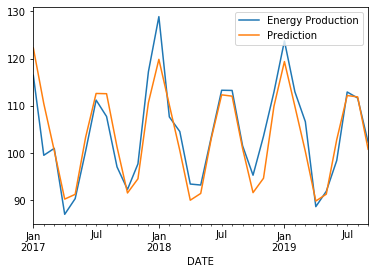

In [38]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

# fund prices 

In [23]:
prices = pd.read_csv('VTSAX-2018.csv', converters={'price': lambda s: float(s.replace('$', '')),
                                                   'yield': lambda s: float(s.replace('%', '')) / 100})

prices.head()

,date,price,yield
0,01/02/2018,67.27,0.0176
1,01/03/2018,67.67,0.0175
2,01/04/2018,67.92,0.0175
3,01/05/2018,68.36,0.0175
4,01/08/2018,68.49,0.0175


In [11]:
start = 10000
n = 12

In [24]:
prices.describe()

,price,yield
count,251.000000,251.000000
mean,68.740558,0.018094
std,2.662293,0.000538
min,58.190000,0.016800
25%,67.105000,0.017800
50%,68.570000,0.018300
75%,70.575000,0.018300
max,73.650000,0.019000


In [25]:
final = 68 * 1.12

In [26]:
perm=1000

In [27]:
lump_sum = np.zeros(perm)
for i, p in enumerate(np.random.choice(prices['price'], size=perm, replace=True)):
    shares = start / p
    lump_sum[i] = shares * final
lump_sum.mean()

11084.286774068134

(array([133., 196., 293., 206., 130.,  15.,  10.,  11.,   3.,   3.]),
 array([10340.80108622, 10615.53692535, 10890.27276449, 11165.00860363,
        11439.74444276, 11714.4802819 , 11989.21612103, 12263.95196017,
        12538.6877993 , 12813.42363844, 13088.15947757]),
 <a list of 10 Patch objects>)

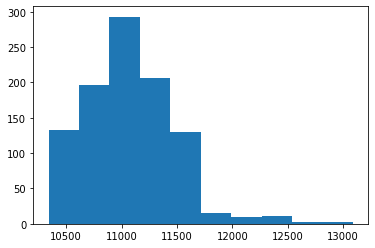

In [28]:
plt.hist(lump_sum)

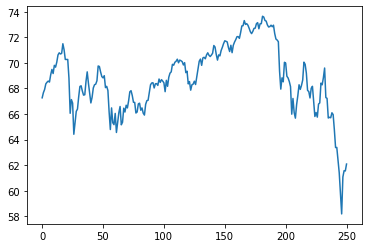

In [29]:
plt.plot(prices.index, prices['price'])

In [31]:
68 * 0.05

3.4000000000000004

# S&P 500 

In [32]:
prices = pd.read_csv('SP500.csv',)

In [34]:
prices.shape

(23050, 7)

In [33]:
prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


In [45]:
prices = pd.read_csv('VTI.csv', parse_dates=['Date'])
prices.set_index('Date', inplace=True)
prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15,55.424999,56.005001,55.174999,55.665001,39.560894,1067400
2001-06-18,55.814999,55.915001,55.310001,55.310001,39.308609,282600
2001-06-19,56.150002,56.165001,55.235001,55.465000,39.418774,1777600
2001-06-20,55.375000,56.075001,55.375000,56.049999,39.834538,476000
2001-06-21,56.000000,56.724998,55.875000,56.500000,40.154324,240400


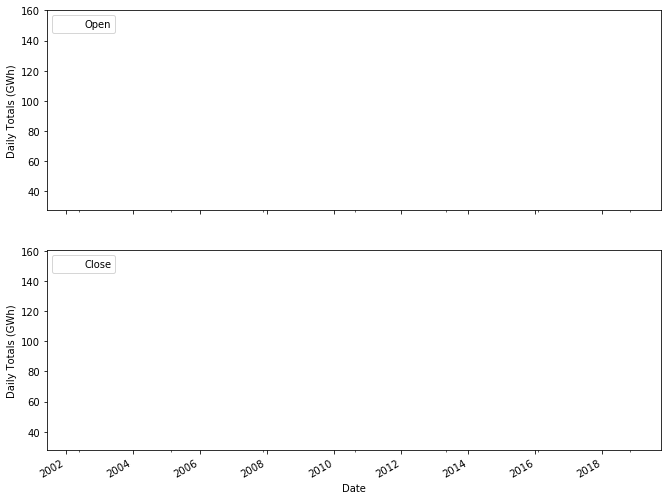

In [47]:
cols_plot = ['Open', 'Close']
axes = prices[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')